In [1]:
from IPython.display import display
from IPython.display import HTML
import IPython.core.display as di # Example: di.display_html('<h3>%s:</h3>' % str, raw=True)

# This line will hide code by default when the notebook is exported as HTML
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

# This line will add a button to toggle visibility of code blocks, for use with the HTML export version
di.display_html('''<button onclick="jQuery('.input_area').toggle(); jQuery('.prompt').toggle();">Toggle code</button>''', raw=True)

Toggle code

In [48]:
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
        display: table-cell;
        text-align: center;
        margin:auto;
    }
.prompt{
    display:none;
}
</style>
""")

<h1><center>Party Donation Study in WA</center></h1>

<h2>Background</h2>

The dataset I am using is a historical donation data around the Washington State area from 2001 to 2017. It consists of several attributes of all the donation through these years. Please see the table below as a demo of variables of interest in this study.

In [43]:
#take a look at the columns of new dataset
donorsmall.head()

,contributor_state,contributor_zip,amount,contributor_city,party,type,primary_general
0,WA,98584,20.00,SHELTON,REPUBLICAN,Candidate,Primary
1,WA,98225,1000.00,BELLINGHAM,DEMOCRAT,Candidate,General
2,WA,99336,30.00,KENNEWICK,NaN,Political Committee,Full election cycle
3,WA,98121,50.00,SEATTLE,NaN,Political Committee,Full election cycle
4,WA,98391,164.17,BONNEY LAKE,DEMOCRAT,Candidate,Primary


<h2>Descriptive Analysis</h2>

In [9]:
#descriptive statistics of column 'amount'
donorsmall['amount'].describe()

count      9491.000000
mean        255.749095
std        2957.761253
min           0.000000
25%          10.000000
50%          35.000000
75%         100.000000
max      122649.590000
Name: amount, dtype: float64

As we can see in the table above, there are 9491 donations happened from 2001 to 2017 around Washington State area. The median of all the donation is 35 dollars. 75 penrcent of the donation are below 100 dollars. However, the largest amount is 122649.59 dollars. Due to the big variation, the standard deviation is pretty huge. (about 3000 dollars)

In [10]:
#donorsmall['amount'].skew()

28.83004919749561

In [11]:
#donorsmall['amount'].kurt()

937.0785212506598

The plot below shows how the donation amount is shaped. We can see that it is very skew to the left. It is nearly shaped as half of the Normal distribution. Most of the donation are arount 0 to 100 dollars. But there are several big amount donations make the graph looks weird. The skewness of the donation amount is 28.83 and the kurtness is 937.08.

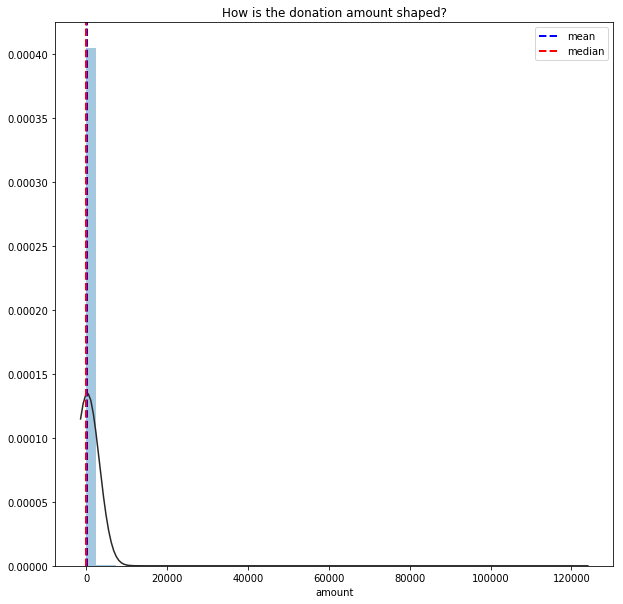

In [14]:
# a simple plot
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

mnVar=donorsmall['amount'].mean()
mdVar=donorsmall['amount'].median()
plt.figure(figsize=(10,10))
sns.distplot(donorsmall['amount'].dropna(),kde=False,fit=norm)
plt.title('How is the donation amount shaped?')
plt.axvline(mnVar, color='b', linestyle='dashed', linewidth=2,label='mean')
plt.axvline(mdVar, color='r', linestyle='dashed', linewidth=2,label='median')
plt.legend()
plt.show()

In [13]:
donorsmall['contributor_city'].describe()

count        9491
unique        718
top       SEATTLE
freq         1790
Name: contributor_city, dtype: object

As we can see in the table above, the 9491 donations are from 718 different cities, in which Seattle coutributes the most, as 1790 times donate.

In [15]:
#descriptive statistics of column 'primary_general'
donorsmall['primary_general'].value_counts()

Full election cycle    6248
Primary                1985
General                1258
Name: primary_general, dtype: int64

The table above shows the distribution of the type of the donation. 6248 donations are for the full election cycle. 1985 donations are only for Primary election and 1258 donations are only for General election. Please see the plot below:

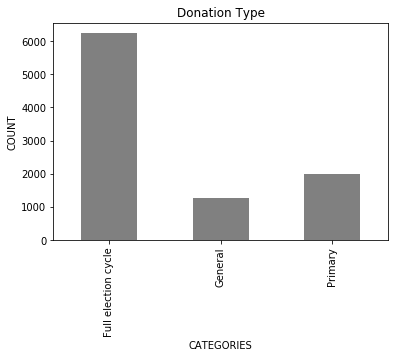

In [52]:
# a simple plot
%matplotlib inline
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donorsmall['primary_general'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Type")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

In [18]:
donorsmall['party'].value_counts()

DEMOCRAT        1366
REPUBLICAN      1148
NON PARTISAN    1090
OTHER             38
NONE              35
INDEPENDENT        3
Name: party, dtype: int64

The table above shows the distribution of the party of the donation. From 2001 to 2017, Democrat gets 1366 times donation. Republican gets 1148 times donation, and Non-Partisan gets 1090 times donation. Please see the plot below:

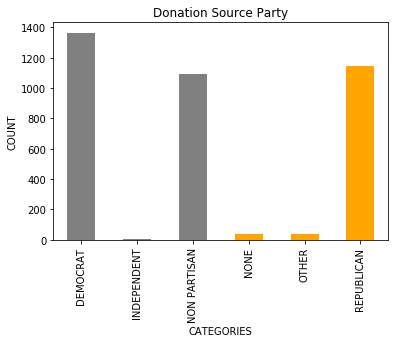

In [19]:
#a simple plot
%matplotlib inline
newerPalette=['grey']*3 + ['orange']*3 + ['turquoise']*3 + ['lightblue']*3
donorsmall['party'].value_counts(sort=False).plot.bar(color=newerPalette, title="Donation Source Party")
plt.ylabel('COUNT')
plt.xlabel('CATEGORIES')
plt.show()

In [20]:
#drop the rows whose party is 'none'
byeCategories=['NONE']
donorDRI=donorsmall[~donorsmall.party.isin(byeCategories)].copy()

The table below shows a pivot table of party and donation type. Except donations to Independent and Other, the count of donation to General election are the most, which could means that people feel more involved in the General election.

In [21]:
#a pivot table of party and primay_general
pd.pivot_table(donorDRI, values='amount',index='primary_general',columns='party', aggfunc='mean')

party,DEMOCRAT,INDEPENDENT,NON PARTISAN,OTHER,REPUBLICAN
primary_general,,,,,
Full election cycle,111.891500,108.5,170.656211,54.266667,149.010714
General,269.072911,NaN,207.928530,183.000000,362.629145
Primary,210.884613,250.0,192.544473,1785.769231,224.178698


In [22]:
#select all the donation happen in seattle
seattle = donorDRI[(donorDRI.contributor_city=='SEATTLE')]

Since Seattle contribute the most part of the donations, lets see several plot of the donation in Seattle.

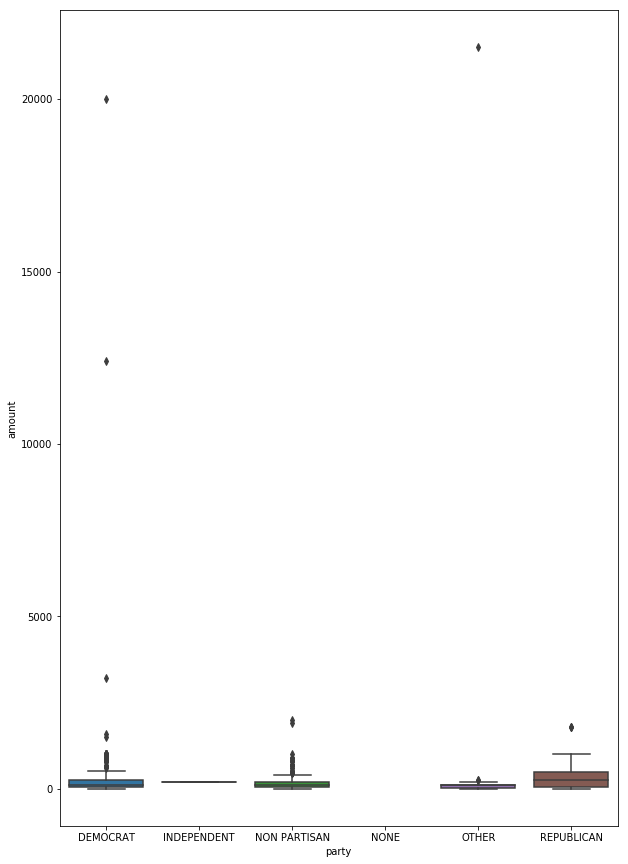

In [23]:
#a box plot to find outliers of the donation of different party
plt.figure(figsize=(10,15))
sns.boxplot(x="party", y="amount", data=seattle)

The Box plot above shows that the variation of the donation in Seattle is huge. There are several prominent outliers that donate huge amount compared to others.

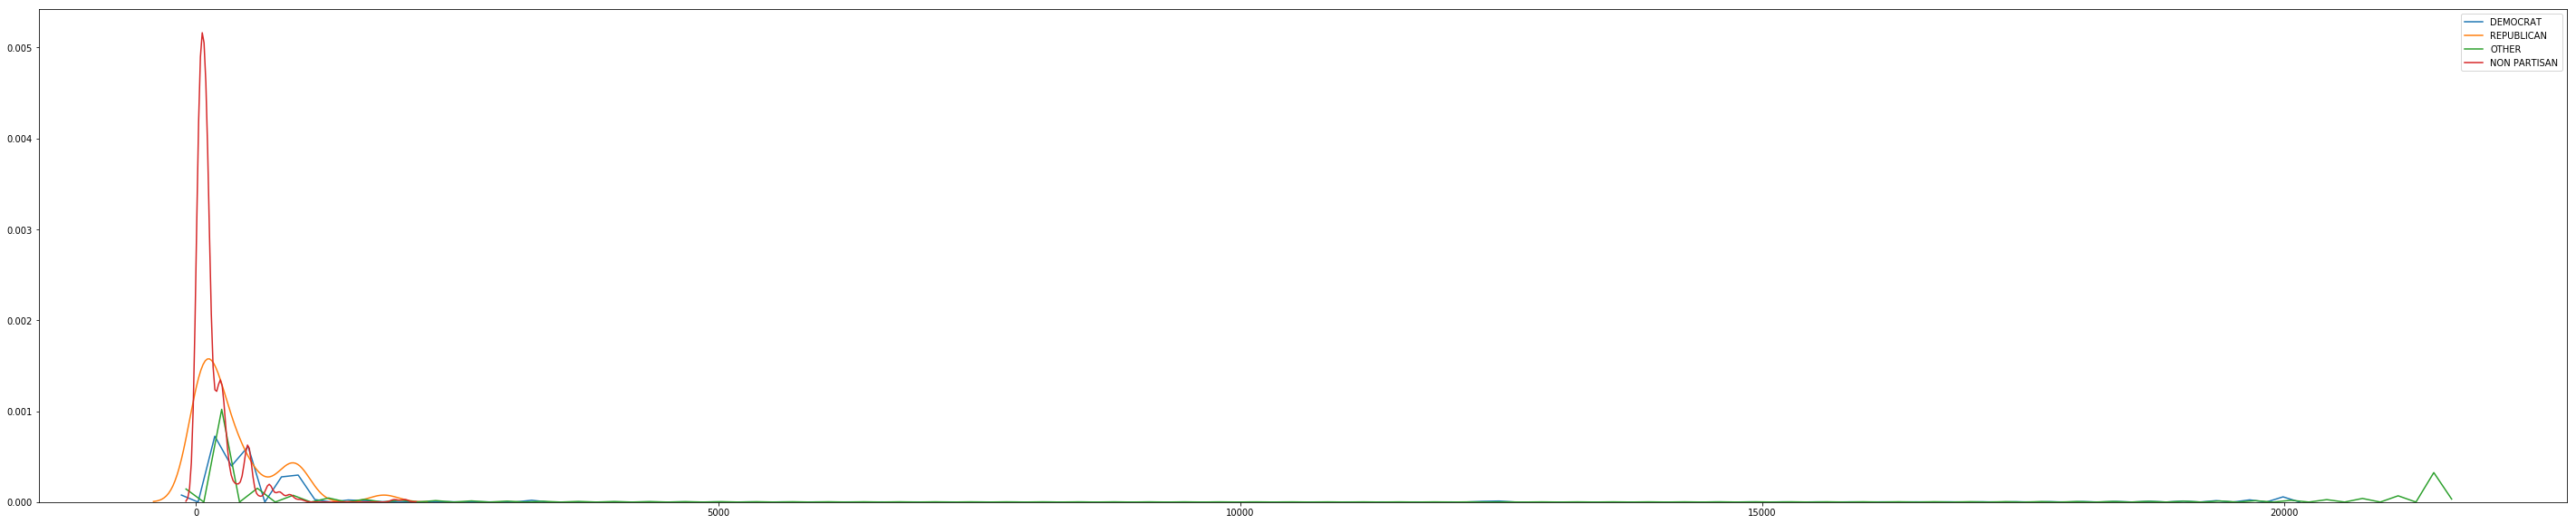

In [24]:
#a kdeplot of donation amout of different party
plt.figure(figsize=(50,10))
sns.kdeplot(seattle[seattle.party=='DEMOCRAT'].amount, label="DEMOCRAT")
sns.kdeplot(seattle[seattle.party=='REPUBLICAN'].amount, label="REPUBLICAN")
sns.kdeplot(seattle[seattle.party=='OTHER'].amount, label="OTHER")
sns.kdeplot(seattle[seattle.party=='NON PARTISAN'].amount, label="NON PARTISAN")
plt.legend();

Also, plot above shows that how the donation distributed for different Party. In general, most of the donation amount are around 100 dollars. However, Democrat and Republican also got considerable times of donations around 1000 dollars.

In [25]:
#drop na in donorDRI for further preparation
donorDRI.dropna(inplace=True)

<h2>Robuset Regression Analysis</h2>

Since we figure out that we have prominent outliers, we should use Robuset linear Model Regression.

In [53]:
#since we figure out that we have prominent outliers,  we should use Robuset linear Model Regression
#regress amount with party, type and primary_general
#with the base as independent party, political committee type and primary use
from statsmodels.robust.robust_linear_model import RLM

formula='amount ~ C(party, Treatment("INDEPENDENT"))+ C(type, Treatment("Political Committee"))+ C(primary_general, Treatment("Primary"))'
LinRegR_catX = RLM.from_formula(formula, donorDRI).fit()
print(LinRegR_catX.summary())

                    Robust linear Model Regression Results                    
Dep. Variable:                 amount   No. Observations:                 3645
Model:                            RLM   Df Residuals:                     3638
Method:                          IRLS   Df Model:                            6
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Sun, 25 Feb 2018                                         
Time:                        10:29:14                                         
No. Iterations:                    50                                         
                                                                      coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------

From the regression result, we can see that there is no statistical significant difference between the donation amount of different parties, which is suprising since Washington State is a loyal voter for Democrat. Also, there is no statistical significant difference between the donation amount to Political Committee and the Candidate. However, compared to the donation amount to Primary election, there is more money donated to General election , which could means that people feel more involved in the General election than the Primary election. A simpler result is shown below:

In [27]:
#a simpler result of the regression
pd.concat({'Coefficients':LinRegR_catX.params,
           'Significant?':LinRegR_catX.pvalues<0.05},axis=1)

,Coefficients,Significant?
Intercept,-5.603382e+14,False
"C(party, Treatment(""INDEPENDENT""))[T.DEMOCRAT]",-5.277148e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.NON PARTISAN]",-4.431165e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.NONE]",-7.123650e+10,False
"C(party, Treatment(""INDEPENDENT""))[T.OTHER]",-6.749830e+01,False
"C(party, Treatment(""INDEPENDENT""))[T.REPUBLICAN]",-4.800437e+01,False
"C(type, Treatment(""Political Committee""))[T.Candidate]",5.603382e+14,False
"C(primary_general, Treatment(""Primary""))[T.Full election cycle]",-2.380214e+01,True
"C(primary_general, Treatment(""Primary""))[T.General]",1.823777e+01,True


In [28]:
#create the link of map of use
compressedMap= 'https://github.com/maomaohenmao/data/raw/master/WAmap.zip'

<h2>Spacial Analysis</h2>

In [29]:
#read the map as .zip file
import geopandas as gpd

wazipMap = gpd.GeoDataFrame.from_file(compressedMap)

In [30]:
#convert data type of the 
wazipMap.ZCTA5CE10=wazipMap.ZCTA5CE10.astype(int)

In [31]:
#have only the donation from WA
donorNEW=donorDRI[donorDRI['contributor_state'] == 'WA']

The table below shows all the donation happened in Washington State. We will use spacial analysis to figure out which area in WA these donations come from. The area catergory I am using is Zipcode.

In [32]:
donorNEW.head()

,contributor_state,contributor_zip,amount,contributor_city,party,type,primary_general
0,WA,98584,20.00,SHELTON,REPUBLICAN,Candidate,Primary
1,WA,98225,1000.00,BELLINGHAM,DEMOCRAT,Candidate,General
4,WA,98391,164.17,BONNEY LAKE,DEMOCRAT,Candidate,Primary
7,WA,99208,5.00,SPOKANE,DEMOCRAT,Candidate,Primary
8,WA,98296,50.00,SNOHOMISH,DEMOCRAT,Candidate,General


In [33]:
#merge data based on zipcode
contribWAmap=wazipMap.merge(donorNEW, left_on='ZCTA5CE10', right_on='contributor_zip')

In the map below, all areas in Pink are the area donated money to the election. All areas in Black are the area didn't donate money to the election.(Or not covered in the dataset I am using)

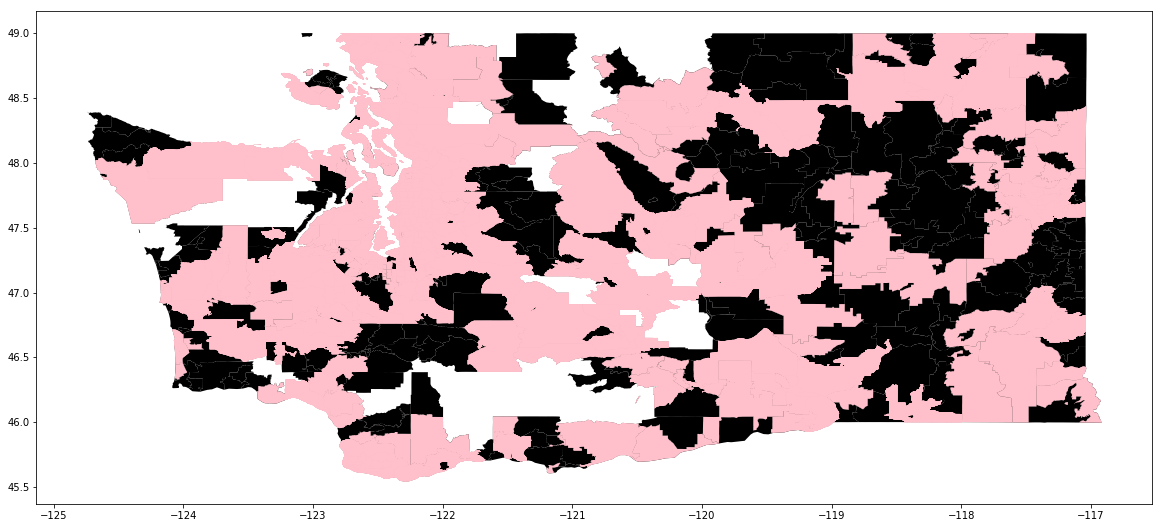

In [34]:
#draw a map to check the area that have no donation
%matplotlib inline
base = wazipMap.plot(color='black',figsize=(20,13))

contribWAmap.plot(ax=base, color='pink')

In [35]:
#check the donation rate of the data
contribWAmap['contribDen']=contribWAmap.amount/contribWAmap.POP2017

In [36]:
#we get a inf saying that we have some missing value in population
import numpy as np

contribWAmap[contribWAmap['contribDen']==np.inf][['contribDen']]
#drop them
contribWAmap=contribWAmap[contribWAmap['contribDen']!=np.inf]

In [55]:
#now we shall see the result
#contribWAmap['contribDen'].describe()

The map below shows that the contribution amount in different Zipcode area.

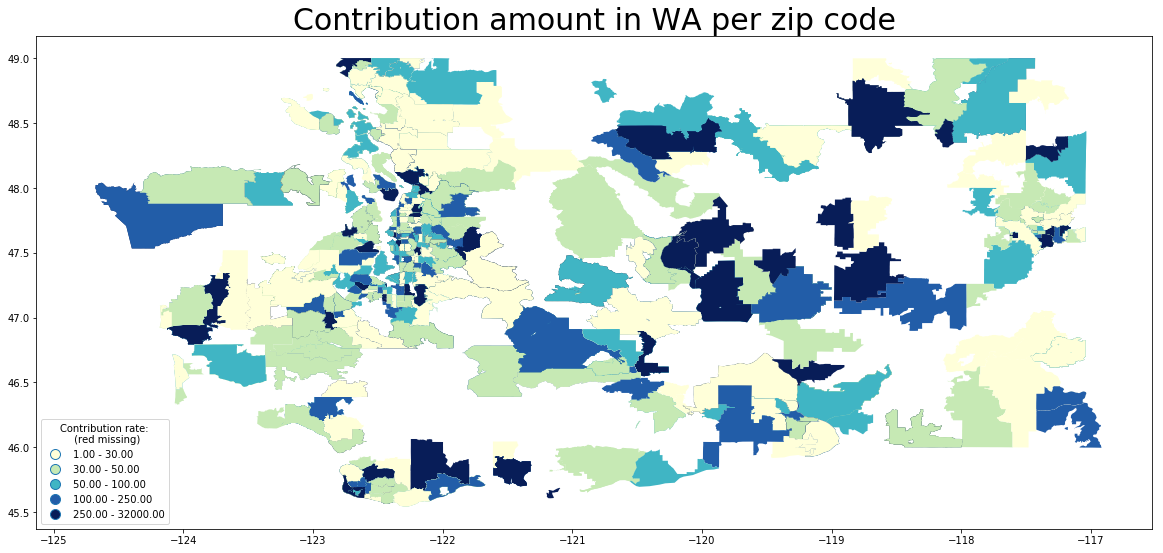

In [56]:
#a plot of the different contribution rate of different regions
import matplotlib.pyplot as plt

base = wazipMap.plot(color='white',figsize=(20,13))

topLayer=contribWAmap.plot(ax=base,column='amount',cmap='YlGnBu',scheme='Quantiles',k=5,legend=True,
                  legend_kwds={'loc': 3,'title':'Contribution rate: \n (red missing)'})
topLayer.set_title('Contribution amount in WA per zip code', 
                   color='black',fontdict={'fontsize':30})
leg = topLayer.get_legend()
plt.setp(leg.get_title(), multialignment='center')
plt.show()

In [40]:
#to save the map using:
#contribWAmap.to_file(driver = 'ESRI Shapefile', filename= "contribWAmap.shp")